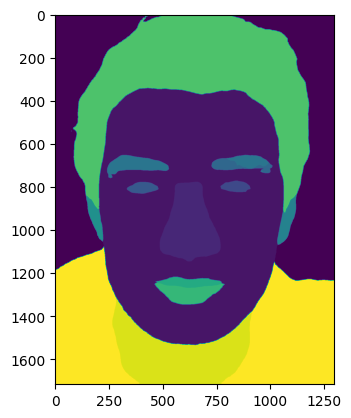

In [8]:
import torch
from torch import nn
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation

from PIL import Image
import matplotlib.pyplot as plt
import requests

# convenience expression for automatically determining device
device = (
    "cuda"
    # Device for NVIDIA or AMD GPUs
    if torch.cuda.is_available()
    else "mps"
    # Device for Apple Silicon (Metal Performance Shaders)
    if torch.backends.mps.is_available()
    else "cpu"
)

# load models
image_processor = SegformerImageProcessor.from_pretrained("jonathandinu/face-parsing")
model = SegformerForSemanticSegmentation.from_pretrained("jonathandinu/face-parsing")
model.to(device)

# expects a PIL.Image or torch.Tensor
url = "/home/karan/kj_workspace/kj_ai/Professional-Headshot-with-single-image/backend/modal_inference/akhil.png"
image = Image.open(url)
image = image.convert("RGB")
image.show()
# run inference on image
inputs = image_processor(images=image, return_tensors="pt").to(device)
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, ~height/4, ~width/4)

# resize output to match input image dimensions
upsampled_logits = nn.functional.interpolate(logits,
                size=image.size[::-1], # H x W
                mode='bilinear',
                align_corners=False)

# get label masks
labels = upsampled_logits.argmax(dim=1)[0]

# move to CPU to visualize in matplotlib
labels_viz = labels.cpu().numpy()
plt.imshow(labels_viz)
plt.show()


In [9]:
labels.shape

torch.Size([1716, 1294])

In [10]:
parsing = labels.cpu().numpy()

In [16]:
import numpy as np

mask_image = np.zeros(parsing.shape)
mask_image[parsing==0] = 1.0
mask_image[parsing==18] = 1.0
mask_image[parsing==17] = 1.0




In [17]:
# calculate segmentation area.

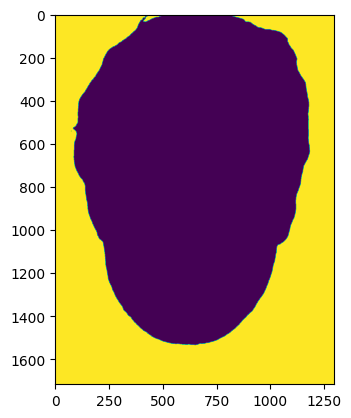

In [18]:
plt.imshow(mask_image)

In [19]:
mask_image = 255 * (mask_image)
mask_image = mask_image.astype(np.uint8)

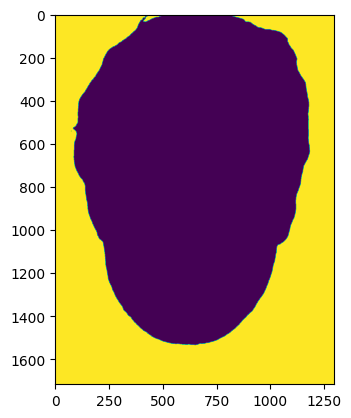

In [20]:
plt.imshow(mask_image)

In [21]:
m_img = Image.fromarray(mask_image)

In [30]:
m_img.show()

In [34]:
m_img.save('akhil_mask.png')

In [29]:
from PIL import Image, ImageFilter

# blur radius and diameter
radius, diameter = 5, 5

img = m_img
# Paste image on white background
background_size = (img.size[0] + diameter, img.size[1] + diameter)
background = Image.new('RGB', background_size, (255, 255, 255))
background.paste(img, (radius, radius))

# create new images with white and black
mask_size = (img.size[0] + diameter, img.size[1] + diameter)
mask = Image.new('L', mask_size, 255)

black_size = (img.size[0] - diameter, img.size[1] - diameter)
black = Image.new('L', black_size, 0)

# create blur mask
mask.paste(black, (diameter, diameter))

# Blur image and paste blurred edge according to mask
blur = background.filter(ImageFilter.GaussianBlur(radius / 2))
background.paste(blur, mask=mask)
background.save("test_image_blurred.jpg", quality=100)

# show blurred edged image in preview
background.show()

In [1]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

url = '/home/karan/kj_workspace/kj_ai/Professional-Headshot-with-single-image/backend/IP_akhil_result2.jpg'
image = Image.open(url)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

/home/karan/anaconda3/envs/python39/lib/python3.9/site-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


/home/karan/anaconda3/envs/python39/lib/python3.9/site-packages/super_image/data/loader.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.as_tensor([lr])


In [2]:
import numpy as np
from PIL import Image

In [3]:
import cv2

In [30]:
preds[0].max()

tensor(1.0167, device='cuda:0', grad_fn=<MaxBackward1>)

In [31]:
preds[0].min()

tensor(-0.0502, device='cuda:0', grad_fn=<MinBackward1>)

In [18]:
preds[0]

tensor([[[ 3.1636e-01,  3.1805e-01,  3.1830e-01,  ...,  2.9814e-01,
           3.0008e-01,  2.9584e-01],
         [ 3.1754e-01,  3.1834e-01,  3.1754e-01,  ...,  2.9836e-01,
           2.9898e-01,  2.9779e-01],
         [ 3.1817e-01,  3.1824e-01,  3.1694e-01,  ...,  2.9821e-01,
           2.9869e-01,  2.9949e-01],
         ...,
         [ 2.8385e-03,  2.5795e-03,  1.3491e-03,  ...,  1.1221e-02,
           1.1267e-02,  1.1092e-02],
         [ 2.0220e-03,  9.1477e-04, -1.8344e-04,  ...,  1.5754e-02,
           1.5468e-02,  1.4105e-02],
         [ 2.9686e-03, -1.7025e-05, -1.1830e-03,  ...,  1.7048e-02,
           1.5976e-02,  1.5479e-02]],

        [[ 3.3312e-01,  3.3548e-01,  3.3432e-01,  ...,  2.9864e-01,
           2.9900e-01,  2.9496e-01],
         [ 3.3358e-01,  3.3389e-01,  3.3294e-01,  ...,  2.9766e-01,
           2.9869e-01,  2.9685e-01],
         [ 3.3348e-01,  3.3369e-01,  3.3255e-01,  ...,  2.9781e-01,
           2.9833e-01,  2.9835e-01],
         ...,
         [ 2.2950e-03,  3

In [36]:
pred = preds.data.cpu().numpy()

#pred = pred[scale:-scale, scale:-scale, :]
#pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

In [37]:
pred[0] = np.clip(pred[0], 0, 255)

In [38]:
pred = pred[0].transpose((1, 2, 0)) * 255

In [39]:
pred

array([[[80.67287   , 84.94438   , 83.62828   ],
        [81.103645  , 85.54828   , 84.14257   ],
        [81.16637   , 85.2519    , 84.099266  ],
        ...,
        [76.02687   , 76.153     , 74.077736  ],
        [76.519356  , 76.24528   , 74.21351   ],
        [75.43926   , 75.21531   , 73.25105   ]],

       [[80.97195   , 85.06416   , 83.89624   ],
        [81.17612   , 85.1424    , 84.2973    ],
        [80.97379   , 84.89917   , 84.15217   ],
        ...,
        [76.08265   , 75.90317   , 74.064674  ],
        [76.23987   , 76.16639   , 74.24903   ],
        [75.937355  , 75.697525  , 73.83661   ]],

       [[81.133316  , 85.03711   , 83.90051   ],
        [81.150154  , 85.09075   , 84.22093   ],
        [80.82092   , 84.79996   , 83.8723    ],
        ...,
        [76.042786  , 75.941246  , 73.98099   ],
        [76.16674   , 76.07299   , 74.03447   ],
        [76.370705  , 76.07913   , 74.2404    ]],

       ...,

       [[ 0.7238089 ,  0.585233  ,  7.973361  ],
        [ 0

In [40]:
pred = pred.astype(np.uint8)

In [41]:
pred.shape

(1024, 1024, 3)

In [42]:
pred.dtype

dtype('uint8')

In [43]:
import matplotlib.pyplot as plt

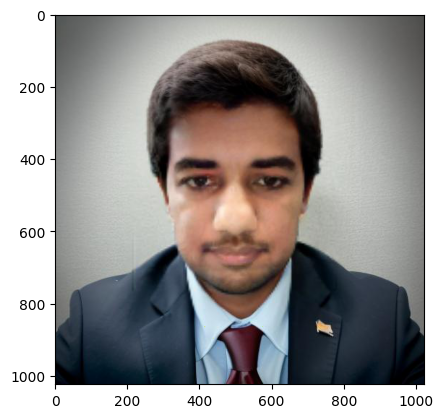

In [44]:
plt.imshow(pred)

In [16]:
result = Image.fromarray(pred)

In [17]:
result.save('exp.png')

In [100]:
from super_image import DrlnModel, ImageLoader
from PIL import Image
import requests

url = '/home/karan/kj_workspace/kj_ai/Professional-Headshot-with-single-image/backend/IP_akhil_result2.jpg'
image = Image.open(url)

model = DrlnModel.from_pretrained('eugenesiow/drln-bam', scale=2)      # scale 2, 3 and 4 models available
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')                        # save the output 2x scaled image to `./scaled_2x.png`
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')      # save an output comparing the super-image with a bicubic scaling


https://huggingface.co/eugenesiow/drln-bam/resolve/main/pytorch_model_2x.pt


: 

In [1]:

import cv2
import numpy as np

# Read the image
image = cv2.imread("./mask.jpg")

# Create a mask
mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
cv2.circle(mask, (100, 100), 50, (255, 255, 255), -1)

# Blur the mask
blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)

# Apply the mask to the image
blurred_image = cv2.bitwise_and(image, image, mask=blurred_mask)

# Display the blurred image
# cv2.imshow("Blurred Image", blurred_image)
# cv2.waitKey(0)

27

In [2]:
cv2.destroyAllWindows()

In [4]:
from PIL import Image, ImageFilter

# blur radius and diameter
radius, diameter = 20, 40

# open an image
img = Image.open("./mask.jpg")
img.show()
# Paste image on white background
background_size = (img.size[0] + diameter, img.size[1] + diameter)
background = Image.new('RGB', background_size, (255, 255, 255))
background.paste(img, (radius, radius))

# create new images with white and black
mask_size = (img.size[0] + diameter, img.size[1] + diameter)
mask = Image.new('L', mask_size, 255)

black_size = (img.size[0] - diameter, img.size[1] - diameter)
black = Image.new('L', black_size, 0)

# create blur mask
mask.paste(black, (diameter, diameter))

# Blur image and paste blurred edge according to mask
blur = background.filter(ImageFilter.GaussianBlur(radius / 2))
background.paste(blur, mask=mask)
background.save("test_image_blurred.jpg", quality=100)

# show blurred edged image in preview
background.show()

In [ ]:
import cv2
import numpy as np

def smooth_and_convert_to_binary(mask_path, output_path):
    # Load the mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Smooth the outline
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
    print(blurred_image)
    # Convert to binary
    _, binary_mask = cv2.threshold(blurred_mask, 127, 255, cv2.THRESH_BINARY)
    print(binary_mask)

    # Save the binary mask
    cv2.imwrite(output_path, binary_mask)

# Example usage
smooth_and_convert_to_binary('akhil_mask.png', 'akhil_smoothed_binary_mask.png')


In [25]:
import cv2

# Load the mask
mask_image = cv2.imread('akhil_mask.png', cv2.IMREAD_GRAYSCALE)

# Define the kernel size for erosion
kernel_size = 50  # You can adjust this value to control the amount of erosion

# Define the kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Apply erosion to the mask_image
eroded_mask = cv2.erode(1-mask_image, kernel, iterations=1)

# Use the eroded mask


In [30]:
import numpy as np

In [32]:
mask_image 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [36]:
mask_area = np.sum(1 - (mask_image / 255))
total_area = np.prod(mask_image.shape)

mask_area_ratio = mask_area / total_area
print("Mask area ratio:", mask_area_ratio)

Mask area ratio: 0.5842484408944997


In [35]:
(mask_area_ratio - 0.3) * 512

204.79999999999998

In [26]:
import matplotlib.pyplot as plt

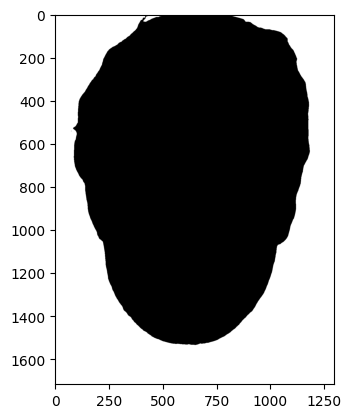

In [27]:
plt.imshow(1-mask_image, cmap='gray')

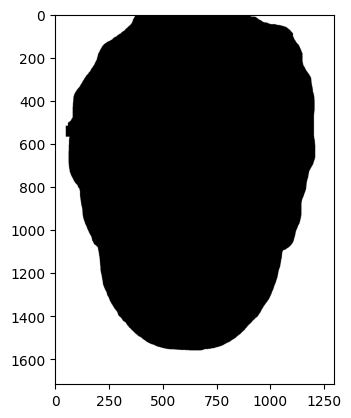

In [28]:
plt.imshow(1-eroded_mask, cmap="gray")

In [ ]:
# Load the source and destination images
src = cv2.imread('source_image.jpg')
dst = cv2.imread('destination_image.jpg')

# Create a mask for the source image
mask = 255 * np.ones(src.shape, src.dtype)

# Specify the center point in the destination image
center = (dst.shape[1] // 2, dst.shape[0] // 2)

# Clone the source image onto the destination image
output = cv2.seamlessClone(src, dst, mask, center, cv2.NORMAL_CLONE)

In [2]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 72.8 MB/s eta 0:00:00
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.dev0 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import rembg
import numpy as np
from PIL import Image

# Load the input image
input_image = Image.open('/home/karan/kj_workspace/kj_ai/Professional-Headshot-with-single-image/backend/modal_inference/akhil.png')

# Convert the input image to a numpy array
input_array = np.array(input_image)

# Apply background removal using rembg
output_array = rembg.remove(input_array)

# Create a PIL Image from the output array
output_image = Image.fromarray(output_array)

# Save the output image
output_image.save('output_image.png')

In [3]:
output_array.shape

(1716, 1294, 4)

In [13]:
output_array = output_array[:,:,:3]

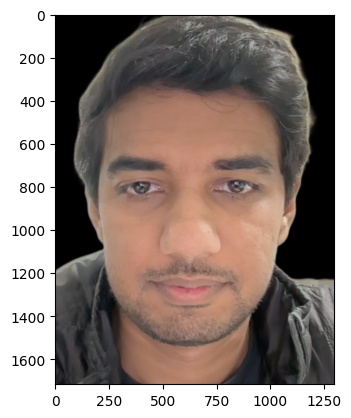

In [14]:
plt.imshow(output_array)

In [15]:
output_array.max(), output_array.min()

(239, 0)

In [16]:
mask = 255 * np.ones(output_array.shape, output_array.dtype)
mask[output_array == 0] = 0

In [17]:
import matplotlib.pyplot as plt

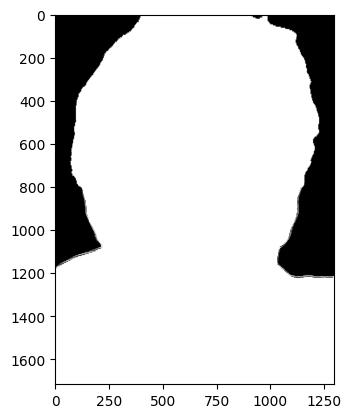

In [18]:
plt.imshow(mask)

In [ ]:
import cv2
import numpy as np

# Load the source and destination images
src = cv2.imread('source_image.jpg')
dst = cv2.imread('destination_image.jpg')

# Create a mask for the source image
mask = 255 * np.ones(src.shape, src.dtype)

# Specify the center point in the destination image
center = (dst.shape[1] // 2, dst.shape[0] // 2)

# Clone the source image onto the destination image
output = cv2.seamlessClone(src, dst, mask, center, cv2.NORMAL_CLONE)

# Display the output image
cv2.imshow('Seamless Cloned Image', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
import cv2
dst = cv2.imread("https://huggingface.co/karanjakhar/office_background/resolve/main/office_background.jpg")

[ WARN:0@1636.442] global loadsave.cpp:248 findDecoder imread_('https://huggingface.co/karanjakhar/office_background/resolve/main/office_background.jpg'): can't open/read file: check file path/integrity


In [5]:
dst

In [6]:
from PIL import Image
import requests
from io import BytesIO

# URL of the image
url = "https://huggingface.co/karanjakhar/office_background/resolve/main/office_background.jpg"

# Send a GET request to the URL
response = requests.get(url)

# Read the image from the response content
image = Image.open(BytesIO(response.content))

# Display the image
image.show()


In [ ]:
import cv2
import numpy as np

# Load the person image, background image, and mask image
person_image = cv2.imread('person_image.jpg')
background_image = cv2.imread('background_image.jpg')
mask_image = cv2.imread('mask_image.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the person image and mask image to match the background image
person_image = cv2.resize(person_image, (background_image.shape[1], background_image.shape[0]))
mask_image = cv2.resize(mask_image, (background_image.shape[1], background_image.shape[0]))

# Create an inverted mask for the person image
mask_inv = cv2.bitwise_not(mask_image)

# Blend the person image with the background image using the mask
person_blended = cv2.bitwise_and(person_image, person_image, mask=mask_inv)
background_blended = cv2.bitwise_and(background_image, background_image, mask=mask_image)
result = cv2.add(person_blended, background_blended)

# Display the result
cv2.imshow('Blended Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
